## Tarea 5 del curso CM-072

* Nombre y apellidos:
* Fecha de presentación: 9 de octubre.

## Lista de preguntas:

1. Presentar un reporte del capítulo  Resampling Methods del libro [An Introduction to Statistical Learning](http://www-bcf.usc.edu/%7Egareth/ISL/index.html) de  Gareth James, Daniela Witten, Trevor Hastie y Robert Tibshirani. Páginas: 175-186. 

In [1]:
# Tu respuesta

2. Sea el siguiente código acerca de validación cruzada y búsqueda grid. Usa GridSearchCV para ajustar n_neighbors of KNeighborsClassifier.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 200
import numpy as np

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digitos = load_digits()
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split( digitos.data, digitos.target)

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
cross_val_score(KNeighborsClassifier(), X_entrenamiento, y_entrenamiento, cv=5)

array([0.97069597, 0.97426471, 0.99256506, 0.98134328, 0.98490566])

In [6]:
from sklearn.model_selection import KFold, StratifiedKFold

In [7]:
cross_val_score(KNeighborsClassifier(),
                X_entrenamiento, y_entrenamiento, cv=KFold(n_splits=10, shuffle=True, random_state=42))

array([0.99259259, 0.99259259, 0.97777778, 0.97777778, 0.98518519,
       0.98518519, 0.97777778, 0.97761194, 0.98507463, 0.98507463])

Búsqueda grid con validación cruzada incorporada.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Definimos los parametros grid:

In [9]:
parametros_grid = {'C': 10. ** np.arange(-3, 3),'gamma' : 10. ** np.arange(-5, 0)}
np.set_printoptions(suppress=True)
print(parametros_grid)

{'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])}


In [10]:
busqueda_grid= GridSearchCV(SVC(), parametros_grid, verbose=3, cv=5)

Un objeto GridSearchCV se comporta como un clasificador normal.

In [11]:
busqueda_grid.fit(X_entrenamiento, y_entrenamiento)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10989010989010989, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .. C=0.001, gamma=1e-05, score=0.11029411764705882, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] .. C=0.001, gamma=1e-05, score=0.11152416356877323, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10820895522388059, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] .. C=0.001, gamma=1e-05, score=0.10943396226415095, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10989010989010989, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.11029411764705882, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.11152416356877323, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] . C=0.001, gamma=0.0001, score=0.10820895522388059, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ..... C=0.1, gamma=0.001, score=0.9560439560439561, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9448529411764706, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9553903345724907, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9440298507462687, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.9660377358490566, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.10989010989010989, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ..... C=0.1, gamma=0.01, score=0.11029411764705882, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..... C=10.0, gamma=0.01, score=0.8171641791044776, total=   0.2s
[CV] C=10.0, gamma=0.01 ..............................................
[CV] ..... C=10.0, gamma=0.01, score=0.7283018867924528, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10989010989010989, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.11029411764705882, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.11152416356877323, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10820895522388059, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] ..... C=10.0, gamma=0.1, score=0.10943396226415095, total=   0.2s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   40.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ]), 'gamma': array([0.00001, 0.0001 , 0.001  , 0.01   , 0.1    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [12]:
busqueda_grid.predict(X_prueba)

array([5, 6, 1, 1, 2, 5, 4, 8, 7, 8, 2, 6, 1, 9, 9, 1, 1, 6, 4, 6, 1, 4,
       1, 5, 4, 4, 0, 2, 3, 5, 2, 1, 8, 1, 5, 2, 9, 0, 5, 7, 0, 9, 3, 6,
       1, 1, 0, 9, 7, 0, 2, 6, 1, 5, 4, 9, 0, 6, 2, 7, 1, 5, 3, 1, 7, 2,
       6, 2, 9, 0, 7, 9, 7, 8, 3, 1, 0, 3, 5, 9, 2, 0, 3, 6, 4, 2, 0, 2,
       5, 1, 8, 6, 2, 5, 6, 4, 9, 3, 8, 8, 6, 1, 7, 8, 3, 5, 0, 4, 2, 3,
       0, 5, 8, 0, 0, 3, 0, 4, 7, 1, 1, 5, 3, 5, 9, 1, 0, 6, 5, 9, 7, 3,
       8, 7, 2, 5, 8, 3, 6, 6, 2, 7, 0, 5, 9, 3, 6, 9, 0, 2, 9, 7, 0, 7,
       4, 4, 8, 8, 3, 6, 4, 4, 0, 9, 4, 1, 9, 5, 4, 6, 9, 0, 9, 8, 7, 2,
       0, 8, 2, 2, 9, 9, 2, 0, 0, 6, 9, 3, 7, 0, 6, 9, 0, 1, 8, 8, 9, 8,
       5, 4, 3, 5, 5, 6, 6, 2, 3, 2, 5, 3, 3, 0, 5, 7, 2, 8, 0, 6, 0, 0,
       3, 0, 3, 7, 7, 9, 8, 4, 9, 1, 2, 3, 8, 5, 1, 1, 8, 5, 4, 7, 8, 1,
       4, 9, 1, 5, 8, 3, 2, 8, 7, 5, 0, 9, 5, 1, 3, 1, 9, 5, 9, 0, 1, 2,
       3, 0, 3, 2, 8, 2, 3, 5, 4, 0, 5, 7, 8, 7, 9, 5, 9, 4, 3, 8, 1, 4,
       2, 1, 1, 6, 6, 7, 8, 4, 2, 8, 3, 5, 1, 2, 1,

In [13]:
busqueda_grid.score(X_prueba, y_prueba)

0.9933333333333333

In [14]:
busqueda_grid.best_params_

{'C': 10.0, 'gamma': 0.001}

In [15]:
busqueda_grid.best_score_

0.9903489235337788

In [16]:
busqueda_grid.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Extraemos los puntajes

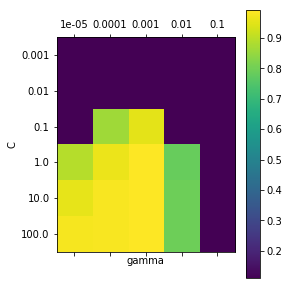

In [17]:
puntuaciones = busqueda_grid.cv_results_['mean_test_score']
puntuaciones = np.array(puntuaciones).reshape(6, 5)

plt.matshow(puntuaciones)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), parametros_grid['gamma'])
plt.yticks(np.arange(6), parametros_grid['C']);


In [18]:
# Tu solucion